**Котов Арсений 4181**

Импорт необходимых библиотек.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import random

Исходные данные. Класс 1 - фирмы, уплачивающие все налоги. 2 - фирмы - уплачивающие не все налоги.

In [10]:
df = pd.read_csv("firms_.csv")
df

,x1,x2,y
0,740,680,1
1,670,600,1
2,560,550,1
3,540,520,1
4,590,540,1
5,590,700,1
6,470,600,1
7,560,540,1
8,540,630,1
9,500,600,1


Группировка данных. Диаграмма рассеяности исходных данных. Можно заметить, что принадлежность фирмы, которую надо найти, по графику нельзя явно определить.

In [11]:
X1 = []
X2 = []
X1_ = []
X2_ = []
X = [[df['x1'][i],df['x2'][i]] for i in range(0,len(df['x1']))]
for el in df.iterrows():
  if el[1]['y'] == 1:
    X1.append(el[1]['x1'])
    X2.append(el[1]['x2'])
  else:
    X1_.append(el[1]['x1'])
    X2_.append(el[1]['x2'])

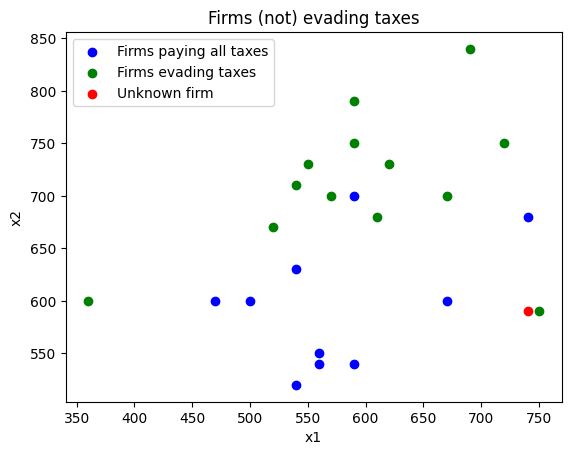

In [12]:
plt.scatter(X1,X2,color='blue')
plt.scatter(X1_,X2_,color='green')
plt.scatter(740,590,color='red')
plt.title('Firms (not) evading taxes')
plt.ylabel('x2')
plt.xlabel('x1')
plt.legend(['Firms paying all taxes', 'Firms evading taxes','Unknown firm'], loc='upper left')
plt.show()

Сплит данных на тестовые(20%) и тренировочные (80%).

In [13]:
x_train = []
x_test = []
y_train = []
y_test = []
percent = 0.8
for i in range(0, len(X1)):
  if i <= percent*len(X1):
    x_train.append([X1[i],X2[i]])
    y_train.append(1)
  else:
    x_test.append([X1[i],X2[i]])
    y_test.append(1)
for i in range(0, len(X1_)):
  if i <= percent*len(X1_):
    x_train.append([X1_[i],X2_[i]])
    y_train.append(2)
  else:
    x_test.append([X1_[i],X2_[i]])
    y_test.append(2)

Метод, вычисляющий точность построенной модели.

In [14]:
def Check_accuracy(model,x,y):
  predicted_y = model.predict(x)
  res = 0
  for i in range(0, len(y)):
    if predicted_y[i] == y[i]:
      res +=1
  return res/len(y)

Kernel (ядро) отвечается за гиперплоскость и может принимать значения “linear” (для линейной), “rbf”,”poly” (для нелинейной). Gamma — это ширина rbf ядра (kernel). Она участвует в подгонке модели и может являться причиной переобучения. С — параметр регуляризации. Он в том числе контролирует соотношение между гладкой границей и корректной классификацией рассматриваемых точек.

In [15]:
best_models = []
predict_f = np.array([740,590]).reshape(1,-1)
for kernel in ['rbf','linear','poly','sigmoid']:
  for C in [0.2,0.4,0.6,0.8,1]:
    for gamma in ['scale', 'auto']:
      svm_model = svm.SVC(C=C, kernel=kernel, gamma=gamma)
      svm_model.fit(x_train,y_train)
      accuracy = Check_accuracy(svm_model,x_test,y_test)
      #print(f'Configuration kernel = {kernel}, gamma = {gamma}, C = {C} accuracy: {accuracy}')
      if accuracy == 1.0:
        best_models.append(svm_model)
      #a = svm_model.predict(np.array([740,590]).reshape(1,-1))
      #print(a)
print('The best configurations are:')
for el in best_models:
  print(f'kernel = {el.kernel}, gamma = {el.gamma}, C = {el.C}')

print(f'The model has predicted, that [740,590] is a behavior of {svm_model.predict(predict_f)[0]} class')

The best configurations are:
kernel = rbf, gamma = scale, C = 0.4
kernel = rbf, gamma = scale, C = 0.6
kernel = rbf, gamma = scale, C = 0.8
kernel = rbf, gamma = scale, C = 1
kernel = poly, gamma = scale, C = 0.2
kernel = poly, gamma = auto, C = 0.2
kernel = poly, gamma = scale, C = 0.4
kernel = poly, gamma = auto, C = 0.4
kernel = poly, gamma = scale, C = 0.6
kernel = poly, gamma = auto, C = 0.6
kernel = poly, gamma = scale, C = 0.8
kernel = poly, gamma = auto, C = 0.8
kernel = poly, gamma = scale, C = 1
kernel = poly, gamma = auto, C = 1
The model has predicted, that [740,590] is a behavior of 2 class


Priors
-подобная массиву формы (n_classes,)
априорные вероятности классов. Если указано, априоры не корректируются в соответствии с данными. Var_smoothing - доля наибольшей дисперсии всех признаков, которая добавляется к дисперсии для стабильности вычислений.

In [16]:
gnb = GaussianNB(priors = None,var_smoothing=1e-09)
gnb_model = gnb.fit(x_train,y_train)
print(f'Accuracy = {gnb_model.score(x_test,y_test)}')
print(f'The model has predicted, that [740,590] is a behavior of {gnb_model.predict(predict_f)[0]} class')

Accuracy = 1.0
The model has predicted, that [740,590] is a behavior of 1 class


n_neighbors - количество соседней, по которым модель определяет принадлежность к классу. weight - функция веса, используемая в предиктах. algorithm - алгоритм, высчитывающий близжайших соседей. p - параметр мощности для метрики Минковского. Когда p = 1, это эквивалентно использованию manhattan_distance (l1) и euclidean_distance (l2) для p = 2.

In [17]:
for n_neighbors in range(1,4):
  for weight in ['uniform','distance']:
    for algorithm in ['ball_tree','kd_tree','brute']:
      for p in range(1,3):
        k_n = KNeighborsClassifier(n_neighbors=n_neighbors,weights=weight,algorithm=algorithm,p=p)
        k_n_model = k_n.fit(x_train,y_train)
        print(f'Accuracy = {k_n_model.score(x_test,y_test)}')
print(f'The model has predicted, that [740,590] is a behavior of {k_n_model.predict(predict_f)[0]} class')

Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 0.6666666666666666
Accuracy = 1.0
Accuracy = 0.6666666666666666
Accuracy = 1.0
Accuracy = 0.6666666666666666
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
Accuracy = 1.0
The model has predicted, that [740,590] is a behavior of 2 class


Критерий Фишера

In [18]:
d_1 = df['x1'].var()
d_2 = df['x2'].var()
print(d_1,d_2)
F = d_1/d_2
# k = n-1 = 22-1 = 21

8211.857707509882 7462.845849802371
